In [414]:
import pandas as pd
import numpy as np
import duckdb

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 15)

db = duckdb.connect() # No need to pass a file name, we will use a VIEW


In [415]:

db.execute('''
           DROP TABLE IF EXISTS SCHOOLS_ALL_DATA;
           CREATE TABLE SCHOOLS_ALL_DATA AS 
                SELECT 
                    'schools' Source,
                    s.URN, 
                    s.Region, 
                    s."London Borough",
                    s."School Name",
                    s."Type",
                    s."Overall Phase",
                    s."Full time equivalent number of pupils in school" "FTE Students",
                    s."% of pupils eligible for FSM" / 100 as "Percent Students FSM",
                    s."% of pupils with EHCP" / 100  "Percent Students EHCP",
                    s."% of pupils with SEN support" / 100 "Percent Students SEN",
                    s."% of pupils with English as an additional language" / 100 "Percent Students ESL",
                    s."FTE Number of teachers" "FTE Teachers",
                    s."Teaching Staff",
                    s."Supply Staff" "Supply Staff Costs",
                    s."Education support staff",
                    s."Staff Total" "Total Staff Costs",
                    s."Maintenance & Improvement" "Maintenance & Improvement Costs",
                    s."Energy",
                    s."Educational Supplies" "Total Costs of Educational Supplies",
                    s."Catering supplies",
                    s."Total Income",
                    s."Total Expenditure",
                    a.READPROG_19,
                    a.WRITPROG_19,
                    a.MATPROG_19,
                    a.READPROG_22,
                    a.WRITPROG_22,
                    a.MATPROG_22,
                    a.READPROG,
                    a.WRITPROG,
                    a.MATPROG
                    FROM parquet_scan('data/duck/schools_finance.parquet') as s
                    JOIN parquet_scan('data/duck/schools_attainment.parquet') as a
                    ON (s.URN = a.URN)
                    WHERE "Overall Phase" = 'Primary'
                UNION
                SELECT 
                    'academies' Source,
                    s.URN, 
                    s.Region, 
                    s."London Borough",
                    s."School Name",
                    s."Type",
                    s."Overall Phase",
                    s."Number of pupils in academy (FTE)"  "FTE Students",
                    (s."% of pupils eligible for FSM") / 100 as "Percent Students FSM",
                    (s."% of pupils with an EHCP") / 100  "Percent Students EHCP",
                    (s."% of pupils with SEN support") / 100 "Percent Students SEN",
                    (s."% of pupils with English as an additional language" / 100) "Percent Students ESL",
                    s."Number of teachers in academy (FTE)" "FTE Teachers",
                    s."Teaching Staff",
                    s."Supply Staff Costs",
                    s."Education support staff",
                    s."Total Staff Costs",
                    s."Maintenance & Improvement Costs",
                    s."Energy",
                    s."Total Costs of Educational Supplies",
                    s."Catering supplies",
                    s."Total Income",
                    s."Total Expenditure",
                    NULL READPROG_19,
                    NULL WRITPROG_19,
                    NULL MATPROG_19,
                    NULL READPROG_22,
                    NULL WRITPROG_22,
                    NULL MATPROG_22,
                    a.READ_PROGSCORE_EM_ADJ_WGTAVG READPROG,
                    a.WRIT_PROGSCORE_EM_ADJ_WGTAVG WRITPROG,
                    a.MAT_PROGSCORE_EM_ADJ_WGTAVG MATPROG
                    FROM parquet_scan('data/duck/academies_finance.parquet') as s
                    JOIN parquet_scan('data/duck/academies_attainment.parquet') as a
                    ON (s.UID = a.TRUST_UID)
                    WHERE "Overall Phase" = 'Primary'
                
           ''')

df = db.query("SELECT * FROM SCHOOLS_ALL_DATA").to_df()
#df['Progress'] = (df['READPROG_19'] + df['WRITPROG_19'] + df['MATPROG_19']) / 3
df


,Source,URN,Region,London Borough,School Name,Type,Overall Phase,...,MATPROG_19,READPROG_22,WRITPROG_22,MATPROG_22,READPROG,WRITPROG,MATPROG
0,academies,138252.0,Yorkshire and the Humber,Neither,Dixons Music Primary,Free schools,Primary,...,NaN,NaN,NaN,NaN,-3.4,-1.3,-1.1
1,academies,140358.0,Yorkshire and the Humber,Neither,Dixons Marchbank Primary,Academy sponsor led,Primary,...,NaN,NaN,NaN,NaN,-3.4,-1.3,-1.1
2,academies,141375.0,Yorkshire and the Humber,Neither,Dixons Manningham Academy,Academy sponsor led,Primary,...,NaN,NaN,NaN,NaN,-3.4,-1.3,-1.1
3,academies,137881.0,South East,Neither,Oaks Primary Academy - Maidstone,Academy sponsor led,Primary,...,NaN,NaN,NaN,NaN,1.4,1.3,1.9
4,academies,142517.0,South East,Neither,Cherry Orchard Primary Academy,Academy sponsor led,Primary,...,NaN,NaN,NaN,NaN,1.4,1.3,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14269,schools,120539.0,East Midlands,Neither,Swinderby All Saints Church of England Primary School,Voluntary controlled school,Primary,...,-3.6,NaN,NaN,NaN,2.3,0.7,3.4
14270,schools,120859.0,East of England,Neither,St William's Primary School,Community school,Primary,...,-1.9,NaN,NaN,NaN,-0.8,-4.1,-3.5
14271,schools,121053.0,East of England,Neither,Salhouse CofE Primary School,Voluntary controlled school,Primary,...,-4.9,NaN,NaN,NaN,-3.1,-0.8,-5.1
14272,schools,123177.0,South East,Neither,St Swithun's CofE Primary School,Voluntary controlled school,Primary,...,-2.0,NaN,NaN,NaN,2.2,-0.6,0.1


In [416]:
# Determine how financial prudance is measured in the education sector
# Total income, total expenditure, pupil numbers
 
df[['URN', 'School Name', 'Region', 'FTE Students', 'Total Income', 'Total Expenditure']]
df["Income per Student"] = df['Total Income'] / df['FTE Students']
df["Expenditure per Student"] = df['Total Expenditure'] / df['FTE Students']
df


,Source,URN,Region,London Borough,School Name,Type,Overall Phase,...,WRITPROG_22,MATPROG_22,READPROG,WRITPROG,MATPROG,Income per Student,Expenditure per Student
0,academies,138252.0,Yorkshire and the Humber,Neither,Dixons Music Primary,Free schools,Primary,...,NaN,NaN,-3.4,-1.3,-1.1,5280.952381,5052.380952
1,academies,140358.0,Yorkshire and the Humber,Neither,Dixons Marchbank Primary,Academy sponsor led,Primary,...,NaN,NaN,-3.4,-1.3,-1.1,5764.835165,5450.549451
2,academies,141375.0,Yorkshire and the Humber,Neither,Dixons Manningham Academy,Academy sponsor led,Primary,...,NaN,NaN,-3.4,-1.3,-1.1,5521.951220,5295.121951
3,academies,137881.0,South East,Neither,Oaks Primary Academy - Maidstone,Academy sponsor led,Primary,...,NaN,NaN,1.4,1.3,1.9,6950.248756,5691.542289
4,academies,142517.0,South East,Neither,Cherry Orchard Primary Academy,Academy sponsor led,Primary,...,NaN,NaN,1.4,1.3,1.9,5544.100802,4648.339061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14269,schools,120539.0,East Midlands,Neither,Swinderby All Saints Church of England Primary School,Voluntary controlled school,Primary,...,NaN,NaN,2.3,0.7,3.4,7343.909518,7568.487108
14270,schools,120859.0,East of England,Neither,St William's Primary School,Community school,Primary,...,NaN,NaN,-0.8,-4.1,-3.5,5907.276135,5775.812101
14271,schools,121053.0,East of England,Neither,Salhouse CofE Primary School,Voluntary controlled school,Primary,...,NaN,NaN,-3.1,-0.8,-5.1,6571.176232,6598.271087
14272,schools,123177.0,South East,Neither,St Swithun's CofE Primary School,Voluntary controlled school,Primary,...,NaN,NaN,2.2,-0.6,0.1,5412.555638,5471.925204


<Axes: xlabel='Total Income', ylabel='Total Expenditure'>

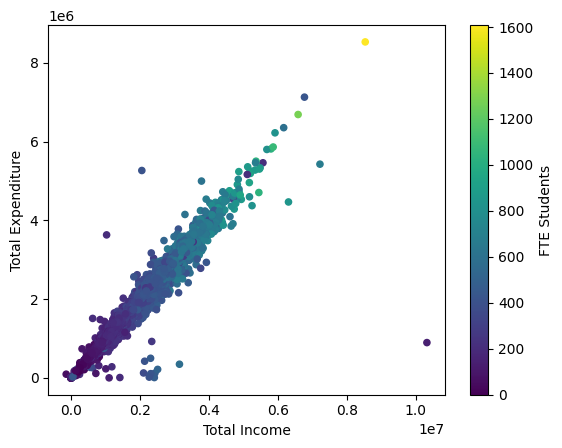

In [417]:
df.loc[(df['Overall Phase'] == 'Primary') & (df['Region'] != 'London')].plot.scatter(x='Total Income', y='Total Expenditure', c='FTE Students')

In [418]:

df['IE Ratio'] = (df['Total Expenditure'] / df['Total Income'])

print('Mean IE Ratio:', df['IE Ratio'].mean())
print('Median IE Ratio:', df['IE Ratio'].median())
print('Min IE Ratio:', df['IE Ratio'].min())
print('Max IE Ratio:', df['IE Ratio'].max())

print('STD IE Ratio:', df['IE Ratio'].std())

Mean IE Ratio: inf
Median IE Ratio: 0.994565556364705
Min IE Ratio: -0.6785714285714286
Max IE Ratio: inf
STD IE Ratio: nan


/Users/andrewmccall/projects/tessa/.venv/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


<Axes: xlabel='IE Ratio', ylabel='PROG'>

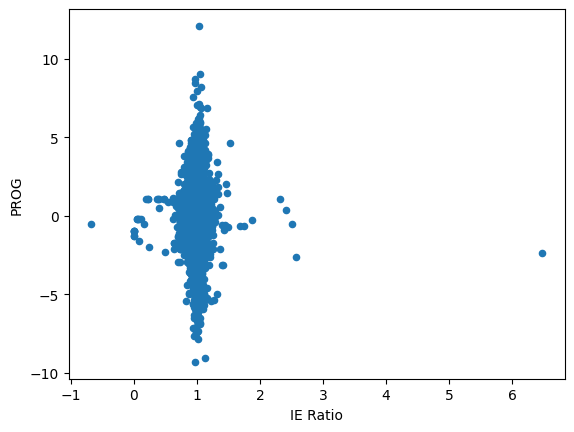

In [419]:
test = df[~pd.to_numeric(df['READPROG'], errors='coerce').isnull()]
test = test[~pd.to_numeric(test['WRITPROG'], errors='coerce').isnull()]
test = test[~pd.to_numeric(test['MATPROG'], errors='coerce').isnull()]
test['PROG'] = (test['READPROG'] + test['WRITPROG'] + test['MATPROG']) / 3
test.plot.scatter(x='IE Ratio', y='PROG')

<Axes: xlabel='Income per Student', ylabel='PROG'>

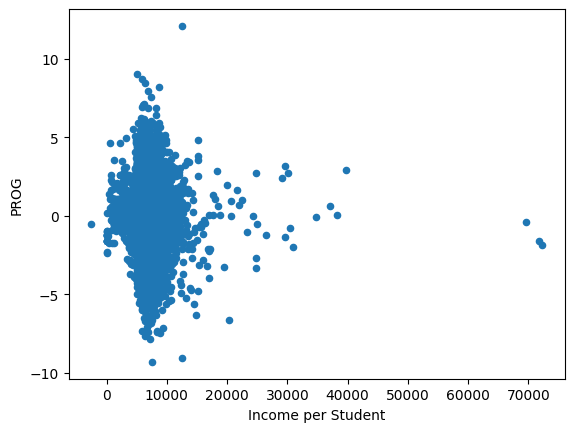

In [420]:
test.plot.scatter(x='Income per Student', y='PROG')

<Axes: xlabel='Expenditure per Student', ylabel='PROG'>

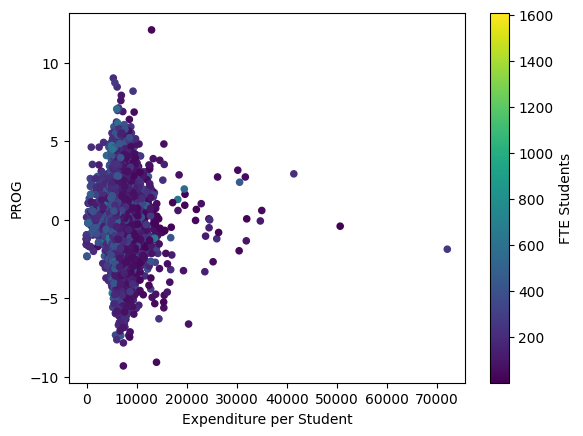

In [421]:
test.plot.scatter(x='Expenditure per Student', y='PROG', c='FTE Students')

<Axes: xlabel='Total Expenditure', ylabel='Teaching Staff'>

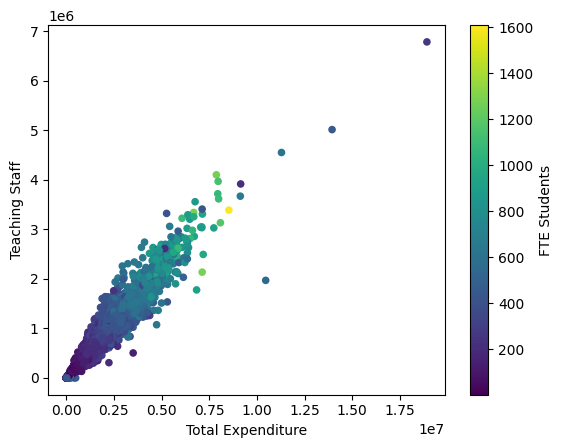

In [422]:
test.plot.scatter(x='Total Expenditure', y='Teaching Staff', c='FTE Students')

<Axes: xlabel='Total Expenditure', ylabel='Supply Staff Costs'>

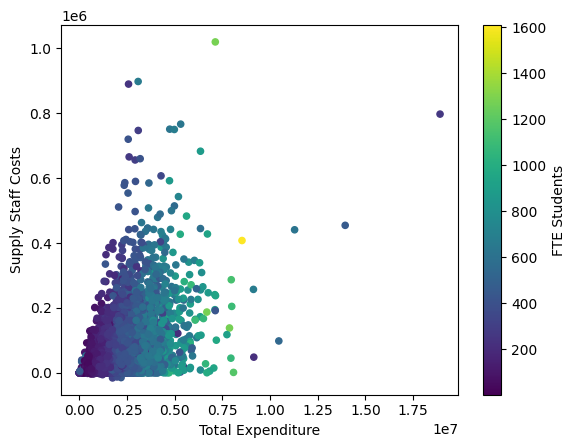

In [423]:
                    
test.plot.scatter(x='Total Expenditure', y='Supply Staff Costs', c='FTE Students')

<Axes: xlabel='Total Expenditure', ylabel='Education support staff'>

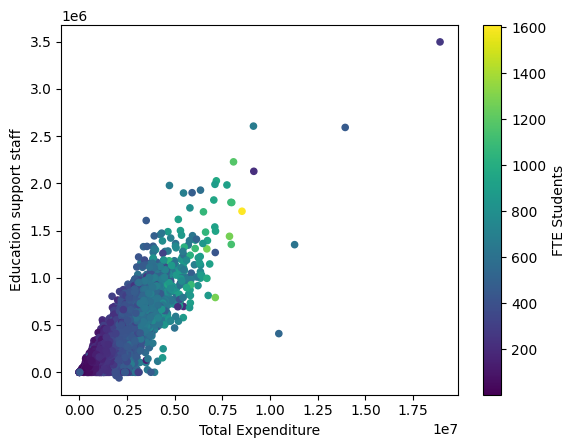

In [424]:

test.plot.scatter(x='Total Expenditure', y='Education support staff', c='FTE Students')

<Axes: xlabel='Total Expenditure', ylabel='Total Staff Costs'>

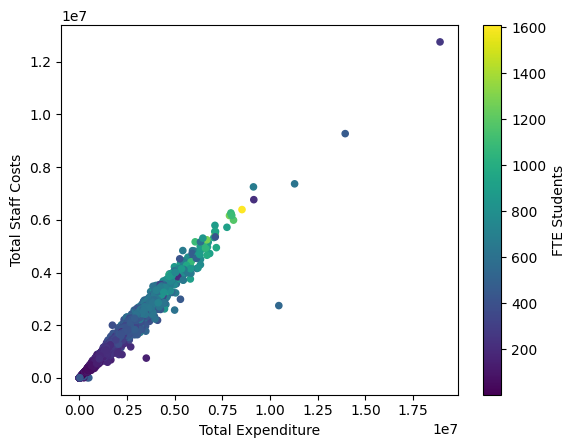

In [425]:

test.plot.scatter(x='Total Expenditure', y='Total Staff Costs', c='FTE Students')

<Axes: xlabel='Total Expenditure', ylabel='Maintenance & Improvement Costs'>

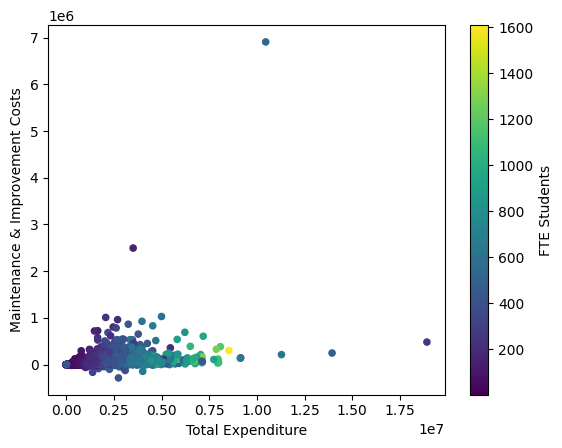

In [426]:

test.plot.scatter(x='Total Expenditure', y='Maintenance & Improvement Costs', c='FTE Students')

<Axes: xlabel='Total Expenditure', ylabel='Energy'>

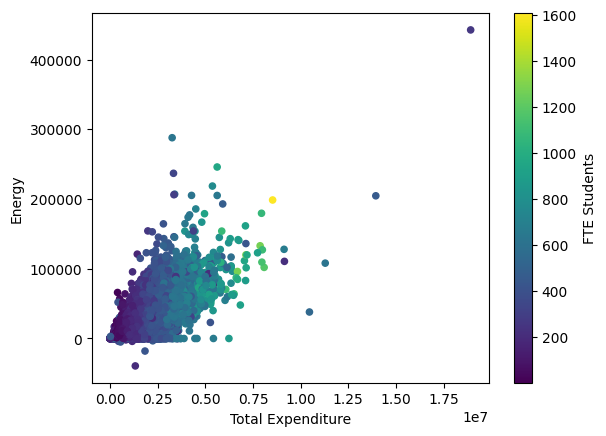

In [427]:

test.plot.scatter(x='Total Expenditure', y='Energy', c='FTE Students')

<Axes: xlabel='Total Expenditure', ylabel='Total Costs of Educational Supplies'>

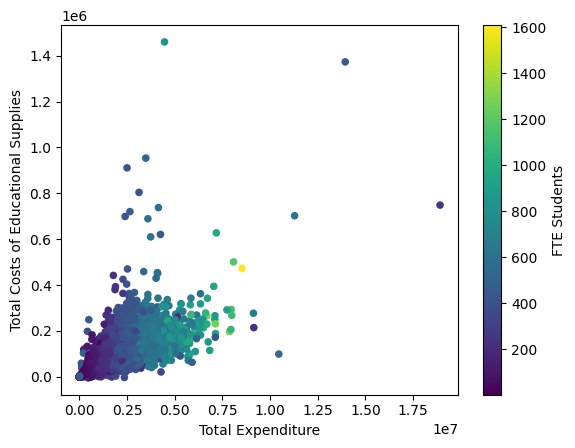

In [428]:

test.plot.scatter(x='Total Expenditure', y='Total Costs of Educational Supplies', c='FTE Students')

<Axes: xlabel='Total Expenditure', ylabel='Catering supplies'>

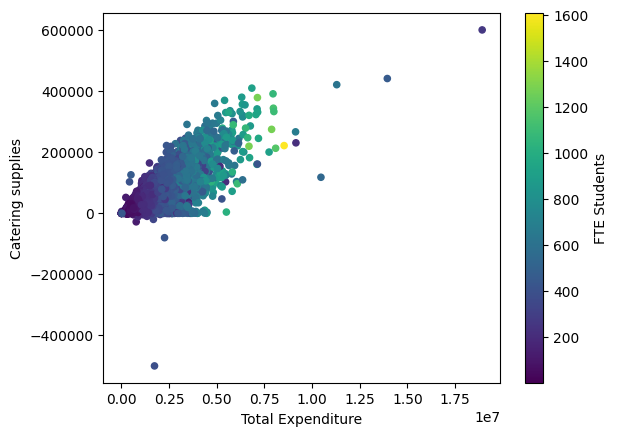

In [429]:

test.plot.scatter(x='Total Expenditure', y='Catering supplies', c='FTE Students')

In [430]:
test

,Source,URN,Region,London Borough,School Name,Type,Overall Phase,...,READPROG,WRITPROG,MATPROG,Income per Student,Expenditure per Student,IE Ratio,PROG
0,academies,138252.0,Yorkshire and the Humber,Neither,Dixons Music Primary,Free schools,Primary,...,-3.4,-1.3,-1.1,5280.952381,5052.380952,0.956718,-1.933333
1,academies,140358.0,Yorkshire and the Humber,Neither,Dixons Marchbank Primary,Academy sponsor led,Primary,...,-3.4,-1.3,-1.1,5764.835165,5450.549451,0.945482,-1.933333
2,academies,141375.0,Yorkshire and the Humber,Neither,Dixons Manningham Academy,Academy sponsor led,Primary,...,-3.4,-1.3,-1.1,5521.951220,5295.121951,0.958922,-1.933333
3,academies,137881.0,South East,Neither,Oaks Primary Academy - Maidstone,Academy sponsor led,Primary,...,1.4,1.3,1.9,6950.248756,5691.542289,0.818898,1.533333
4,academies,142517.0,South East,Neither,Cherry Orchard Primary Academy,Academy sponsor led,Primary,...,1.4,1.3,1.9,5544.100802,4648.339061,0.838430,1.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14269,schools,120539.0,East Midlands,Neither,Swinderby All Saints Church of England Primary School,Voluntary controlled school,Primary,...,2.3,0.7,3.4,7343.909518,7568.487108,1.030580,2.133333
14270,schools,120859.0,East of England,Neither,St William's Primary School,Community school,Primary,...,-0.8,-4.1,-3.5,5907.276135,5775.812101,0.977745,-2.800000
14271,schools,121053.0,East of England,Neither,Salhouse CofE Primary School,Voluntary controlled school,Primary,...,-3.1,-0.8,-5.1,6571.176232,6598.271087,1.004123,-3.000000
14272,schools,123177.0,South East,Neither,St Swithun's CofE Primary School,Voluntary controlled school,Primary,...,2.2,-0.6,0.1,5412.555638,5471.925204,1.010969,0.566667
